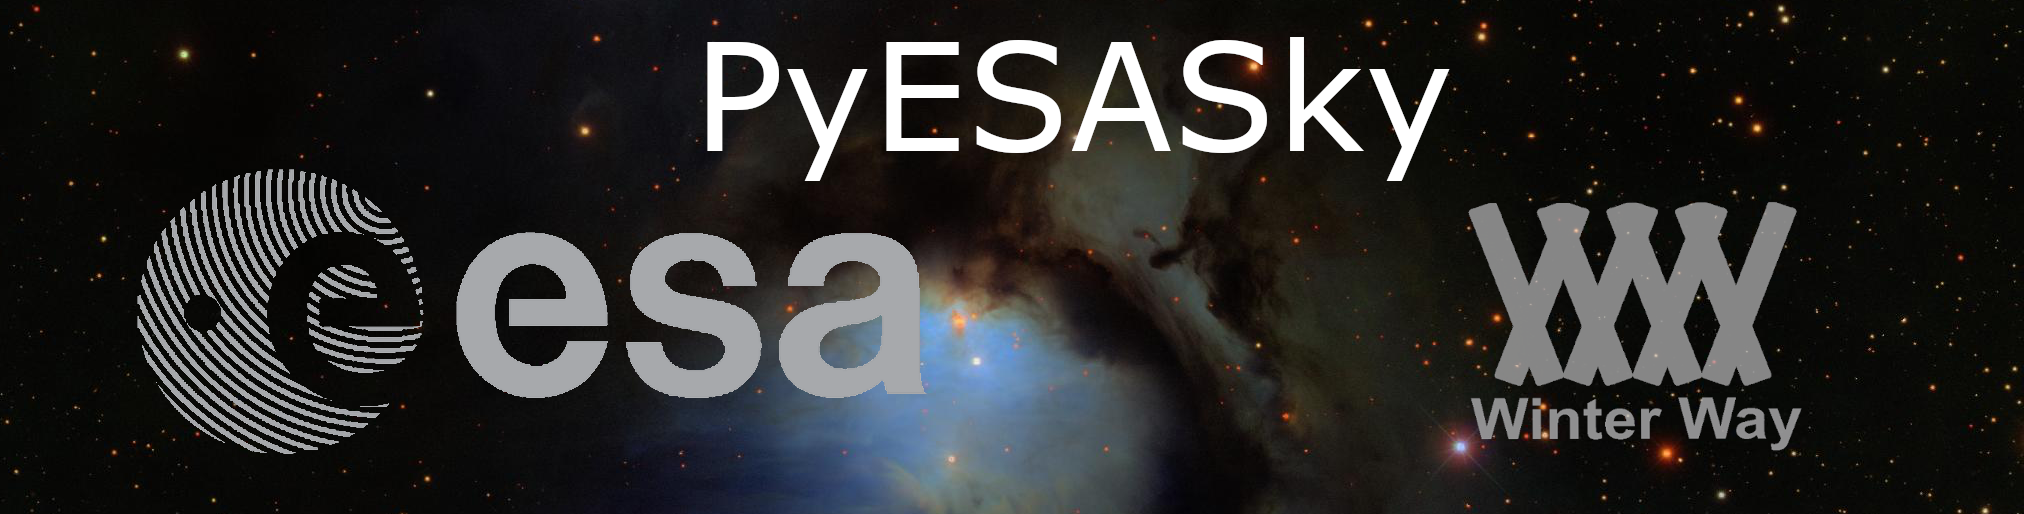

<table style="text-align: center;">
    <tr>
        <td style="font-size: 4em;font-weight: bold;color: #8080ff;"> Bidirectional communication in Jupyter Lab </td>
    </tr>
    <tr>
         <td style="font-size: 2.5em;font-weight: bold;">Mattias Wångblad</td>
    </tr>
    <tr>
         <td style="font-size: 2em;font-weight: italics;">mattias@winterway.eu</td>
    </tr>
    <tr>
         <td style="font-size: 2em;">WinterWay, ESAC Science Data Centre (ESDC), European Space Agency</td>
    </tr>
        <tr>
         <td style="font-size: 2.5em;">Fabrizio Giordano, Henrik Norman, Elena Racero, Deborah Baines, Marcos López-Caniego, Belén López-Martí, Bruno Merín & Christophe Arviset</td>
    </tr>
</table>
<br><br><br>

<p style="font-weight: bold;text-align: center;font-size: 2.5em;color: #8080ff">Simplified installation</p>


<p style="font-weight: bold;font-size: 1.8em;">
PyESASky is now available on PyPI
</p>

```bash
$ pip install pyesasky 
```

This is enough to use in Jupyter notebook and contains all the python code

<p style="font-weight: bold;font-size: 1.8em;">
Jupyter Lab
</p>

```bash
$ jupyter labextension install pyesasky
```
PyESASky jupyter labextension is on <b> npm </b> which is the distributor used for jupyter labextensions.
It is important to make sure that the version numbers align of the installed versions from pip and npm in order for the code to work

<p style="font-weight: bold;font-size: 1.8em;">Understanding the code</p>
All of the functions are now documented. Use the IPython ? magic to read about the function. Use tab to complete function names etc.

In [1]:
from pyesasky import ESASkyWidget
?ESASkyWidget.goToRADec

Signature: ESASkyWidget.goToRADec(self, ra, dec)
Docstring:
Moves the center of the view to the specified coordinate 
in current coordinate system

Arguments:
ra -- float or string in sexagesimal or decimal format
dec -- float or string in sexagesimal or decimal format
File:      ~/anaconda3/lib/python3.7/site-packages/pyesasky/pyesasky.py
Type:      function


<p style="font-weight: bold;font-size: 1.8em;">Sample code</p>
We also have prepared a lot of sample notebooks which utilise all of the PyESASky functions. You can find them here:

[https://github.com/esdc-esac-esa-int/pyesasky/tree/master/samples](https://github.com/esdc-esac-esa-int/pyesasky/tree/master/samples)

<br><br>
<p style="font-weight: bold;text-align: center;font-size: 3em;color: #8080ff">Introduction</p>



In [2]:
from pyesasky import ESASkyWidget
import pandas as pd
esasky = ESASkyWidget()
esasky

ESASkyWidget(layout=Layout(align_self='stretch', height='400px'))

In Jupyter lab, the widget can be placed in a new tab by rightclicking left of trhe output and pressing <i>"Create New View for Output"</i>. 

In [3]:
esasky.setViewHeight('950px')

NOTE: Brief information about communication between kernel and display in Jupyter to highlight the difficulties with bidirectional communication

<br><br>
<p style="font-weight: bold;text-align: center;font-size: 3em;color: #8080ff">Receiving data from ESASky</p>

Response from the ESASky widget can now be retrieved inside the cell and applied to a variable for later use

In [31]:
coorJ2000=esasky.getCenter('J2000')
print(coorJ2000)

{'ra': 211.33351627945765, 'dec': 54.62455545808974, 'fov': 0.425789102394}


<br><br>
The python kernel will wait for the widget to respond and throw a TimeOutException if no response is received
<br>
Some calls could take a long time so the time out can be set manually

In [32]:
esasky.messageTimeOut=10 #In seconds

<br><br>
Information about the available data in the current view can be retrieved. For example the number of observations per mission.

In [33]:
esasky.goToTargetName('M101')
esasky.setFoV(0.5)
obsCount = esasky.getObservationsCount()
obsCount = pd.DataFrame.from_dict([obsCount]).transpose()
obsCount.columns = ['Count']
obsCount

Count
Chandra            26
HST              1920
Herschel           11
INTEGRAL            4
ISO                 8
SUZAKU              1
Total            1984
XMM                 3
XMM-OM-OPTICAL      4
XMM-OM-UV           7

<br><br>
Plot the and load data into the notebook. Parse it e.g. with Pandas

In [34]:
esasky.plotObservations('Chandra')

Image observations from missionId: Chandra displayed in the ESASky


In [35]:
data=esasky.getResultPanelData()
chandra = pd.DataFrame.from_dict(data).transpose()
chandra

dec_deg            duration instrument_name observation_id  \
0   54.36617870729886     98.379672624139            ACIS            934   
1   54.30769371490185  54.418877688321004            ACIS           5340   
2   54.37881258434746     70.772344415838            ACIS           5309   
3   54.33815714251274  42.615061673251006            ACIS           5323   
4   54.39342027683863  56.241022297440004            ACIS           4731   
5   54.31173111303902     66.203736825423            ACIS           6114   
6   54.39714338574777     14.276574804827            ACIS           2779   
7   54.35441471608113   77.35038107091701            ACIS           4736   
8   54.34239223296048     64.699824506586            ACIS           5322   
9    54.3076666866133     14.321921305223            ACIS           5339   
10  54.36364286305469  47.948263341730005            ACIS           6170   
11   54.3117264052059     35.758328464376            ACIS           6115   
12  54.30770968159752      9.942882494493            ACIS           5337   
13  54.30769789632425       35.4777971181            ACIS           4734   
14  54.36417892377343     21.854120818051            ACIS           4737   
15  54.30769363120514     28.568015098572            ACIS           5338   
16   54.3640188883953  29.376841891896003            ACIS           6169   
17  54.34889228869093   9.630075238985901            ACIS           2065   
18  54.31172440282851  28.779700235887002            ACIS           4735   
19  54.27085621178512     49.085676019901            ACIS          14341   
20  54.37882030666137     69.792865259435            ACIS           4732   
21  54.39347129730056      3.094953284739            ACIS           5296   
22  54.36364730039454      40.65618428317            ACIS           6175   
23  54.35441227414978     44.090648063848            ACIS           6152   
24  54.31178209521733  11.459432731975001            ACIS           6118   
25  54.33923594416175  24.814553260803002            ACIS           4733   

                                         postcard_url  \
0   http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
1   http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
2   http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
3   http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
4   http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
5   http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
6   http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
7   http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
8   http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
9   http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
10  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
11  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
12  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
13  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
14  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
15  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
16  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
17  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
18  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
19  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
20  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
21  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
22  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
23  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
24  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   
25  http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   

                                          product_url             ra_deg  \
0   http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...   210.780569741203   
1   http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...  210.7692776947518   
2   http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...  210.7445676626917   
3   http://cdaftp.cfa.harvard.edu/cgi-bin/chaser_f...  210.7274421785241   
4   http://cdaftp.cfa.harvard.edu/cgi-bin

<br> We can download and check the postcard of a observation

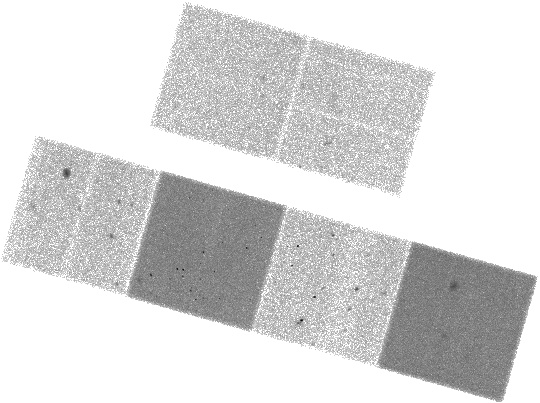

In [36]:
from IPython.display import Image
Image(chandra.iloc[3]['postcard_url'])

<p style="font-weight: bold;text-align: center;font-size: 2em;color: #8080ff">Data download</p>

Function to parse filename from download request

In [37]:
import re
import requests
def get_filename_from_cd(cd):
    """
    Get filename from content-disposition
    """
    if not cd:
        return None
    fname = re.findall('filename="?(.+)"?', cd)
    if len(fname) == 0:
        return None
    return fname[0]

In [38]:
ls -lh  /Users/mattiasw/IVOA/downloads

total 1760
-rw-r--r--  1 mattiasw  staff   878K Oct 11 22:19 acisf04731N003_full_img2.fits


<br><br>
The data can e.g. be used to access and download the associated data products. Here we access the 4:th in the list
<br>
This can of course be looped to download all in the list.

In [39]:
r = requests.get(chandra.iloc[3]['product_url'])
filename = get_filename_from_cd(r.headers.get('content-disposition'))
with open('/Users/mattiasw/IVOA/downloads/'+ filename, 'wb') as f:
    f.write(r.content)

In [40]:
ls -lh  /Users/mattiasw/IVOA/downloads

total 3696
-rw-r--r--  1 mattiasw  staff   878K Oct 11 22:19 acisf04731N003_full_img2.fits
-rw-r--r--  1 mattiasw  staff   968K Oct 11 22:31 acisf05323N003_full_img2.fits


In [41]:
esasky.closeResultPanelTab()

<br><br>
<p style="font-weight: bold;text-align: center;font-size: 3em;color: #8080ff">Sliding over different HiPS</p>

In [42]:
esasky.goToRADec('17 46 10', '-28 51 49')
esasky.setFoV(1)

A new feature in ESASky is the HiPS Slider so we have added functions to populate the skyPanel.

In [43]:
esasky.openSkyPanel()
esasky.setHiPS('Chandra RGB')
esasky.addHiPS("XMM-Newton UV color")
esasky.addHiPS("DSS2 Color")
esasky.addHiPS("2MASS color JHK")
esasky.addHiPS("Spitzer cold SEIP IRAC-1-3-4 RGB bright")
esasky.addHiPS("Herschel PACS RGB 70, 160 micron")

<br>We can move between them programmatically

In [44]:
esasky.setHiPSSliderValue(1)

And fade between 2 different

In [45]:
esasky.setHiPSSliderValue(2.55)

This can of course be set programatically to loop over all of them 

In [46]:
nSkies = esasky.getNumberOfSkyRows()
import time
for i in range((nSkies-1)*100):
    esasky.setHiPSSliderValue(i/100.0)
    time.sleep(0.02)

<br>
<p style="font-weight: bold;text-align: center;font-size: 2em;color: #8080ff">HiPS from local machine</p>

A new feature is also that we can now add a HiPS from our local machine to visualize meaning that you can use pyesasky fully offline to visualise your data

In [47]:
esasky.addHiPS("MyLocalHiPS", "/Users/mattiasw/IVOA/LFI_SkyMap_030_1024_R3.00_full_HiPS/")
esasky.setHiPSColorPalette('PLANCK')

hipsURL http://localhost:8900/Users/mattiasw/IVOA/LFI_SkyMap_030_1024_R3.00_full_HiPS/
imgFormat png


<br><br>
<p style="font-weight: bold;text-align: center;font-size: 2em;color: #8080ff">Looping over Planck wavelengths</p>


In [48]:
esasky.removeHiPS()
esasky.goToRADec('17 49 43', '-30 47 08')
esasky.goToTargetName('orion')
esasky.setFoV(100)

We can get hold of all the available HiPS in ESASky and then select for example all the smoothed Planck HiPS

In [50]:
hips = esasky.getAvailableHiPS()
hips

{'GAMMA_RAY': {'Fermi color': {'mission': 'FERMI',
   'missionURL': 'http://fermi.gsfc.nasa.gov/',
   'wavelengthRange': '30 MeV - 10 GeV',
   'instrument': '',
   'creator': 'Centre de Donnees astronomiques de Strasbourg',
   'creatorURL': 'http://cdsweb.u-strasbg.fr',
   'creationDate': '2013-06-28T11:09Z',
   'moreInfoURL': 'http://alasky.u-strasbg.fr/Fermi/Color/properties',
   'surveyId': 'Fermi color',
   'surveyName': 'Fermi color',
   'surveyRootUrl': 'http://cdn.skies.esac.esa.int/FermiColor/',
   'surveyFrame': 'EQUATORIAL',
   'maximumNorder': 3,
   'imgFormat': 'jpg',
   'isDefault': True,
   'icon': 'nasa_logo.png',
   'colorPalette': 'NATIVE'}},
 'HARD_X_RAY': {'INTEGRAL-IBIS RGB': {'mission': 'INTEGRAL',
   'missionURL': 'http://www.cosmos.esa.int/web/integral',
   'wavelengthRange': '15 keV - 1 MeV',
   'instrument': 'IBIS',
   'creator': 'European Space Agency (INTEGRAL Science Operations Centre & ESAC Science Data Centre)',
   'creatorURL': 'http://www.esa.int/',
   '

In [51]:
planckHips = [];
for wave in hips.values():
    for mission in wave.values():
        if 'Planck' in mission['surveyId'] and not 'smoothed' in mission['surveyId']:
            planckHips.append(mission['surveyId'])
            
    
planckHips = planckHips[::-1]
planckHips

['Planck LFI 030 GHz',
 'Planck LFI 044 GHz',
 'Planck LFI 070 GHz',
 'Planck HFI 100 GHz',
 'Planck HFI 143 GHz',
 'Planck HFI 217 GHz',
 'Planck HFI 353 GHz',
 'Planck HFI 545 GHz',
 'Planck HFI 857 GHz']

In [52]:
esasky.openSkyPanel()
esasky.setHiPS(planckHips[0])
for i in range(1,len(planckHips)):
    esasky.addHiPS(planckHips[i])

In [53]:
esasky.closeSkyPanel()

We can even create a slider in the python interface to control the HiPS

In [54]:
import asyncio
nSkies = esasky.getNumberOfSkyRows()
def wait_for_change(widget, value):
    future = asyncio.Future()
    def getvalue(change):
        future.set_result(change.new)
        widget.unobserve(getvalue, value)
    widget.observe(getvalue, value)
    return future

from ipywidgets import FloatSlider
slider = FloatSlider(min=0.0, max=nSkies-1, step=0.01,  continuous_update=True)

async def f():
    while True:
        x = await wait_for_change(slider, 'value')
        esasky.setHiPSSliderValue(x)
asyncio.ensure_future(f())

slider

FloatSlider(value=0.0, max=8.0, step=0.01)